## **CatBoost**

CatBoost (Categorical Boosting) is a gradient boosting library developed by Yandex. It is designed to handle categorical features efficiently without the need for extensive preprocessing like one-hot encoding. CatBoost is known for its ease of use, high accuracy, and resistance to overfitting, making it a strong competitor to XGBoost and LightGBM.

#### **How It Works**
1. *Gradient Boosting on Decision Trees* - Builds an ensemble of trees sequentially to minimize a loss function
2. *Ordered Boosting* - Uses a permutation-driven method to reduce prediction shift and overfitting
3. *Efficient Handling of Categorical Features* - Converts categorical features into numerical values using statistics from the dataset (target-based encoding with built-in safeguards)
4. *Symmetric Trees* - Grows balanced, symmetric trees that improve prediction speed and reduce memory usage

#### **Advantages**
- Minimal data preprocessing (handles categorical, numerical, and missing values automatically)
- Robust against overfitting due to ordered boosting
- Often achieves strong performance with default parameters
- Supports multi-class classification, ranking, and regression


#### **Limmitations**
- Training can be slower than LightGBM on very large datasets
- Less mature ecosystem compared to XGBoost and LightGBM
- Still a "black box" model, less interpretable than single Decision Tree

### **Import necessary libraries**

In [1]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

e:\diabetes-classification\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Prepare train, test data**

In [2]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')

In [3]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Initialize model**

In [4]:
model = CatBoostClassifier()

In [5]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=0)

In [6]:
y_pred = model.predict(X_test)

In [7]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], shape=(19994,))

Accuracy:  0.9717415224567371
Recall:  0.6847058823529412
Precision:  0.9756915339480302
F1 Score:  0.8047010024196336


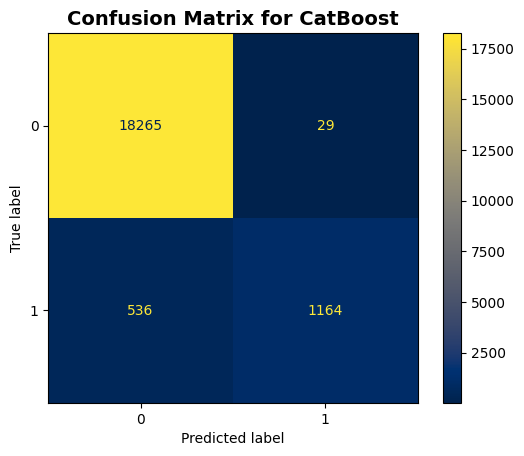

In [8]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for CatBoost", fontsize=14, weight='bold')
plt.show()

### **Fine-tune hyperparameters**

In [9]:
# def objective(trial):
#     params = {
#         "iterations": trial.suggest_int("iterations", 200, 1000),
#         "depth": trial.suggest_int("depth", 3, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
#         "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
#         "border_count": trial.suggest_int("border_count", 32, 255),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "random_strength": trial.suggest_float("random_strength", 0, 10),
#         "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 10),
#         "od_type": "Iter",
#         "od_wait": 20,
#         "verbose": 0,
#         "loss_function": "Logloss",
#         "eval_metric": "Accuracy"
#     }

#     model = CatBoostClassifier(
#         **params,
#         random_state=42
#     )

#     model.fit(
#         X_train, y_train,
#         eval_set=[(X_test, y_test)],
#     )

#     preds = model.predict(X_test)
#     return accuracy_score(y_test, preds)


# # Run optimization
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=10000, timeout=39600)  # 10000 trials or 11 hours

# print("Best parameters:", study.best_params)
# print("Best CV accuracy:", study.best_value)

We found the best params is: `{'iterations': 292, 'depth': 10, 'learning_rate': 0.24279522906072473, 'l2_leaf_reg': 2.3045763969228004, 'border_count': 251, 'subsample': 0.6977028919084041, 'random_strength': 0.8571984222128668, 'bagging_temperature': 9.197443355871247}`

In [10]:
best_params = {'iterations': 292, 'depth': 10, 'learning_rate': 0.24279522906072473, 'l2_leaf_reg': 2.3045763969228004, 'border_count': 251, 'subsample': 0.6977028919084041, 'random_strength': 0.8571984222128668, 'bagging_temperature': 9.197443355871247}

In [11]:
best_model = CatBoostClassifier(
    **best_params,
    random_state=42
)

In [12]:
best_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=0)

In [13]:
best_y_pred = best_model.predict(X_test)

Accuracy:  0.9728918675602681
Recall:  0.6947058823529412
Precision:  0.9808970099667774
F1 Score:  0.8133608815426997


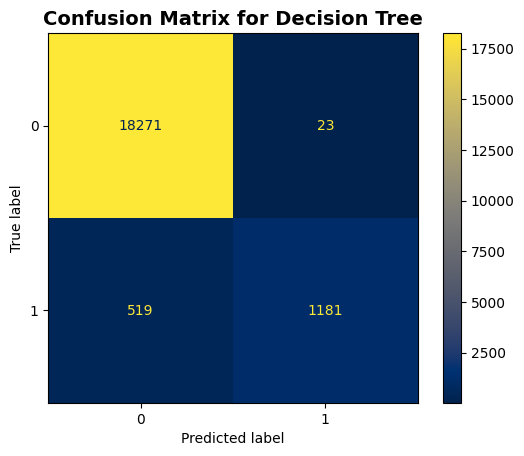

In [14]:
print("Accuracy: ", accuracy_score(y_test, best_y_pred))
print("Recall: ", recall_score(y_test, best_y_pred))
print("Precision: ", precision_score(y_test, best_y_pred))
print("F1 Score: ", f1_score(y_test, best_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for Decision Tree", fontsize=14, weight='bold')
plt.show()

### **Save model**

In [15]:
import joblib 
joblib.dump(best_model, '../checkpoints/catboost.pkl')

['../checkpoints/catboost.pkl']